## Values-based Inference

30 2
Discrete(2) 2
Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=60, out_features=32, bias=True)
  (2): ReLU()
  (3): Linear(in_features=32, out_features=32, bias=True)
  (4): ReLU()
  (5): Linear(in_features=32, out_features=2, bias=True)
)
0 0 0 {'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
1 1 0 {'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Long: 1>}
2 0 0.16706085205078125 {'total_reward': 0.16706085205078125, 'total_profit': 1.0060656939797372, 'position': <Positions.Short: 0>}
3 0 0 {'total_reward': 0.16706085205078125, 'total_profit': 1.0060656939797372, 'position': <Positions.Short: 0>}
4 0 0 {'total_reward': 0.16706085205078125, 'total_profit': 1.0060656939797372, 'position': <Positions.Short: 0>}
5 1 0 {'total_reward': 0.16706085205078125, 'total_profit': 1.0060656939797372, 'position': <Positions.Long: 1>}
6 0 0.12529945373535156 {'total_reward': 0.2923603057861328, 'total_profit': 1.010127695

c:\Users\Laptop K1\AppData\Local\Programs\Python\Python311\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.render_all to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_all` for environment variables or `env.get_wrapper_attr('render_all')` that will search the reminding wrappers.
  logger.warn(


61 1 0 {'total_reward': -1.9073486328125e-06, 'total_profit': 0.9896690544748324, 'position': <Positions.Long: 1>}
62 1 0 {'total_reward': -1.9073486328125e-06, 'total_profit': 0.9896690544748324, 'position': <Positions.Long: 1>}
63 1 0 {'total_reward': -1.9073486328125e-06, 'total_profit': 0.9896690544748324, 'position': <Positions.Long: 1>}
64 1 0 {'total_reward': -1.9073486328125e-06, 'total_profit': 0.9896690544748324, 'position': <Positions.Long: 1>}
65 1 0 {'total_reward': -1.9073486328125e-06, 'total_profit': 0.9896690544748324, 'position': <Positions.Long: 1>}
66 0 -0.8770599365234375 {'total_reward': -0.8770618438720703, 'total_profit': 0.9401187203701132, 'position': <Positions.Short: 0>}
67 1 0 {'total_reward': -0.8770618438720703, 'total_profit': 0.9401187203701132, 'position': <Positions.Long: 1>}
68 0 0.6682415008544922 {'total_reward': -0.20882034301757812, 'total_profit': 0.9757690856661622, 'position': <Positions.Short: 0>}
69 1 0 {'total_reward': -0.20882034301757812,

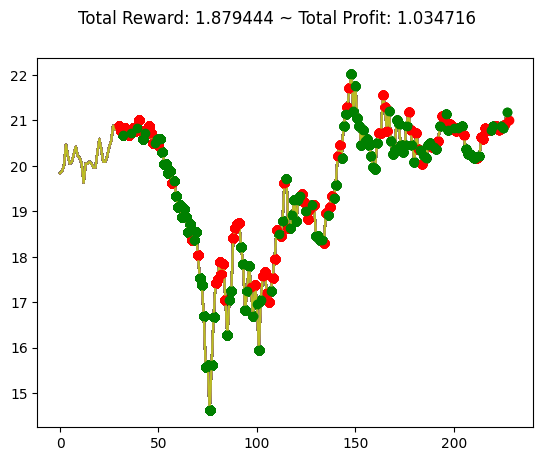

In [ ]:
import gymnasium as gym
import gym_anytrading
import pandas as pd
import numpy as np
# from stock_agent import MyAgent
import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque

df = pd.read_csv('Dataset\ACB.csv')
env = gym.make('stocks-v0', df=df, frame_bound=(1000,1200), window_size=30)
state, _ = env.reset()

# Định nghĩa state_size và action_size
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
print(state_size, action_size)
print(env.action_space, action_size)

class MyAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size

        # Set the device
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        # Replay buffer
        self.replay_buffer = deque(maxlen=50000)

        # Agent parameters
        self.gamma = 0.99
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.98
        self.learning_rate = 0.001
        self.update_targetnn_rate = 10

        # Define main and target networks, and move them to the appropriate device
        self.main_network = self.build_nn().to(self.device)
        self.target_network = self.build_nn().to(self.device)
        self.target_network.load_state_dict(self.main_network.state_dict())

        # Define optimizer
        self.optimizer = optim.Adam(self.main_network.parameters(), lr=self.learning_rate)

    def build_nn(self):
        model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.state_size * 2, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, self.action_size)
        )
        return model
    
loaded_model = MyAgent(state_size, action_size).build_nn()
print(loaded_model)
loaded_model.load_state_dict(torch.load("trained_DQN_agent_10_updaterade.pth"))

#------------------
state, info = env.reset()


# # Set the model to evaluation mode
# loaded_model.eval()
n_timesteps = 200
total_reward = 0
list_act = []
for t in range(n_timesteps):
    env.render_all()
    # Lấy state hiện tại đưa vào predict
    state = torch.tensor(state).unsqueeze(0)
    q_values = loaded_model(state)
    max_q_values = np.argmax(q_values.detach().numpy())

    # Action vào env và lấy thông so
    next_state, reward, terminal, truncate, info = env.step(action=max_q_values)
    if terminal or truncate:
        break
    total_reward += reward
    state = next_state
    list_act.append(max_q_values)
    # print(t, max_q_values, reward, info)

# print("Total list_act:", list_act)
# count_sell, count_buy = 0, 0
# for i in list_act:
#     if i == 0:
#         count_sell += 1
#     else:
#         count_buy += 1
# print(count_sell, count_buy)
    

## DPG Inference

30 2
Discrete(2) 2
PolicyNetwork(
  (fc1): Linear(in_features=60, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (output): Linear(in_features=32, out_features=2, bias=True)
)
[[19.88014  0.04176]
 [20.00544  0.1253 ]
 [20.46485  0.45941]
 [20.21426 -0.25059]
 [20.0472  -0.16706]
 [20.08897  0.04177]
 [20.25603  0.16706]
 [20.42309  0.16706]
 [20.21426 -0.20883]
 [20.1725  -0.04176]
 [20.0472  -0.1253 ]
 [19.62955 -0.41765]
 [20.0472   0.41765]
 [20.0472   0.     ]
 [20.08897  0.04177]
 [20.0472  -0.04177]
 [19.96367 -0.08353]
 [19.96367  0.     ]
 [20.29779  0.33412]
 [20.59015  0.29236]
 [20.33956 -0.25059]
 [20.08897 -0.25059]
 [20.08897  0.     ]
 [20.21426  0.12529]
 [20.42309  0.20883]
 [20.54838  0.12529]
 [20.8825   0.33412]
 [20.79897 -0.08353]
 [20.84074  0.04177]
 [20.8825   0.04176]]


c:\Users\Laptop K1\AppData\Local\Programs\Python\Python311\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.render_all to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_all` for environment variables or `env.get_wrapper_attr('render_all')` that will search the reminding wrappers.
  logger.warn(


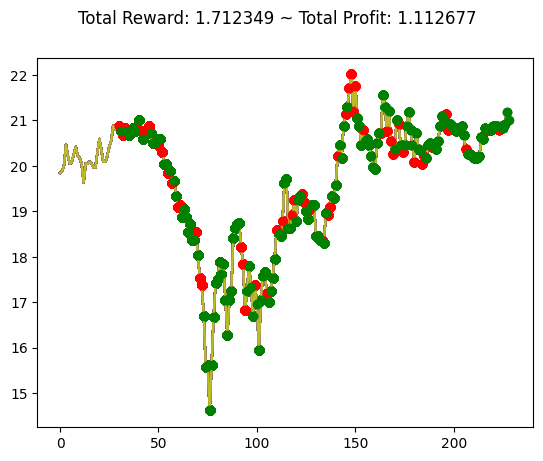

In [ ]:
import gymnasium as gym
import gym_anytrading
import pandas as pd
import numpy as np
# from train_stock_agent_DPG import PolicyNetwork
import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque
from torch.distributions import Categorical

class PolicyNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(PolicyNetwork, self).__init__()
        self.fc1 = nn.Linear(state_size * 2, 32)  # state_size * 2 để làm phẳng từ 30x2 thành 60
        self.fc2 = nn.Linear(32, 32)
        self.output = nn.Linear(32, action_size)

    def forward(self, x):
        x = x.view(-1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.softmax(self.output(x), dim=-1)  # Đầu ra xác suất
        return x

df = pd.read_csv('Dataset\ACB.csv')
env = gym.make('stocks-v0', df=df, frame_bound=(1000,1200), window_size=30)
state, _ = env.reset()

# Định nghĩa state_size và action_size
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
print(state_size, action_size)
print(env.action_space, action_size)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loaded_model = PolicyNetwork(state_size, action_size)#.to(device)
print(loaded_model)
loaded_model.load_state_dict(torch.load("trained_policy_model.pth"))

#------------------
state, info = env.reset()
print(state)


# # Set the model to evaluation mode
# loaded_model.eval()
has_stock_count = 0 
n_timesteps = 200
total_reward = 0
list_act = []
for t in range(n_timesteps):
    env.render_all()
    # Lấy state hiện tại đưa vào predict
    state = torch.tensor(state).unsqueeze(0)
    # q_values = loaded_model(state)
    probs = loaded_model(state).cpu()
    
    action = Categorical(probs).sample().item()
    # print(action)

    # Action vào env và lấy thông so
    next_state, reward, terminal, truncate, _ = env.step(action=action)
    if terminal or truncate:
        break
    total_reward += reward
    state = next_state
    
    # print(t, action, reward)

    